In [1]:
import torch
import torch.nn as nn
from torch.nn.parameter import Parameter
from torchvision import transforms
import numpy as np
from PIL import Image

In [2]:
def binarize(im, thres=100):
    tmp = np.array(im)
    tmp[tmp >= thres] = 255
    tmp[tmp < thres] = 0
    return Image.fromarray(tmp)

im = Image.open('Lenna.png')
# to grayscale
im = im.convert('L')
im = binarize(im)

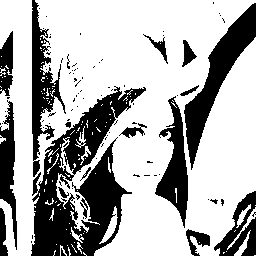

In [3]:
im

In [4]:
conv = nn.Conv2d(1, 1, kernel_size = 3, stride=1, padding=1, bias=False)

kernel = np.array([[
    [
        [-1., -1., -1.],
        [-1.,  8., -1.],
        [-1., -1., -1.]
    ]
]])

conv.weight = Parameter(torch.from_numpy(kernel).float(), requires_grad=False)

In [5]:
# .unsqueeze(0): [1, 256, 256] -> [1, 1, 256, 256]
im_tensor = transforms.ToTensor()(im).unsqueeze(0)
convolved_im_tensor = conv.forward(im_tensor)

In [6]:
# .squeeze(0): [1, 1, 256, 256] -> [1, 256, 256]
im2 = transforms.ToPILImage()(convolved_im_tensor.cpu().squeeze(0))

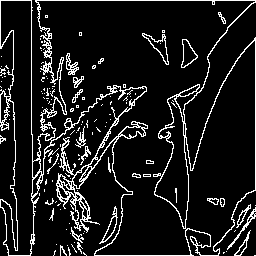

In [7]:
im2